# Support Vector Machines

Author: Cesar Wen Zhu <br>
Date: 22/11/20

In this notebook, we will explore an in-depth view of Support Vector Machines (SVM) and the mathematical basis that defines it. We will also explore a short handwritten digit recognition using sklearn.

Note that this notebook is heavily based on the concepts provided in the book of Mathematics for Machine Learning by Deisenroth et al. [1]. For this reason, in-text reference won't be done for [1] since most of the theory in this notebook revolves around Deisenroth et al.'s book. Additionally, the notebook uses the Sci-Kit learn library for illustration purposes and to introduce some of the tools for SVM. The goal of this notebook is to touch on the concepts of support vector machines and glance at some of the derivations, not to provide an in-depth ground-up construction of a support vector machine model.

To run this notebook you should have the following Python packages installed:
* `NumPy`
* `matplotlib`
* `sklearn`

## Introduction

Support Vector Machines (SVM) is a supervised learning method used for binary classification. This means that the machine learning task only predicts either a +1 or -1. We can define the predictor label to be in the form of:
$${f}:\mathbb{R}^{D}\to\{{+1,-1\}}$$
We will consider that each data vector set $\vec{x}_{n}\to\mathbb{R}^{D}$ of $D$ dimensions will have labels of $y_{n}\to\{+1,-1\}$. Given the training data set of feature-label pair $\{(x_{1}, y_{1}),...,(x_{n},y_{n})\}$, we would build a supervised model that has the capability of classifying between the two classes.

An example of such a data set can be observed below [2]. 

(0.0, 10.0)

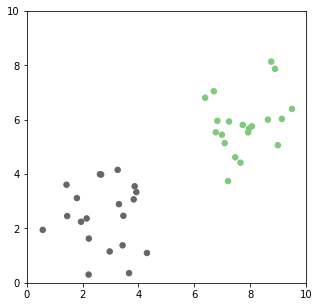

In [1]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Create a sample of 40 random with 2 classes of clusters
X, y = make_blobs(n_samples=40, centers=2, random_state=3)

# Center data such that we are able to have the origin (for illustration)
X[:, 0] = X[:, 0] + 7
X[:, 1] = X[:, 1] + 2

# Plot the generated samples
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Accent)
plt.ylim(0,10)
plt.xlim(0,10)

In this data set, we have 40 labeled samples that span in the 2-D space. The black dots may represent the binary class of -1, and the green dots may represent the binary class of +1. We would have to build a model that sets a boundary decision line such that classification between the two classes can be achieved. As you may notice, there are infinite ways to define this boundary decision line.

Below we have some examples of boundary decision lines. Note that there are many ways to identify the linear classifier. 


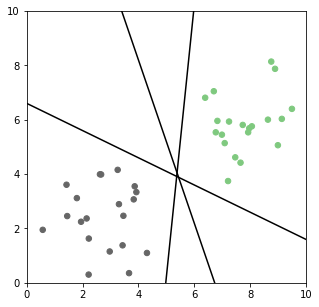

In [2]:
# Define a spaced x-values between 0 and 10
xfit = np.linspace(0, 10)

# Plot data vectors
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Accent)

# Plot various boundary decision lines 
for m, b in [(-3, 20.2), (10, -49.8), (-0.5, 6.6)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

So how does SVM build a model that can classify both classes? We introduce the concepts of hyperplanes and margins.

## Hyperplanes 

The SVM defines the boundary decision line that separates the two different binary classes using a hyperplane. The hyperplane is described as a D-1 dimension affine subspace, where D is the dimension that the vector space spans. In the figure above, we would have data sets spanned in the 2-D space such that we can define a hyperplane of 1-D. You will notice that we use both boundary decision lines and hyperplane interchangeably since both describe the same properties in the 2-D space. In higher-order cases, such as fourth-dimensional classification, the separation between the classes would just be referred to as hyperplanes.

To define a hyperplane that can separate both classes, the SVM defines a criterion that seeks to maximize the distance from the hyperplane to a vector. The distance from a data vector to the hyperplane defines the margin of the classifier [3]. To visualize this, we can observe the figure below. 

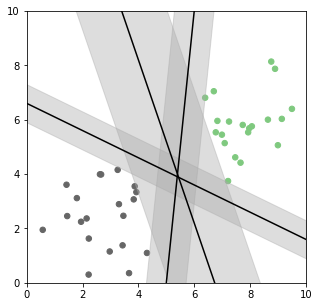

In [3]:
# Plot data vectors
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Accent)

# Plot boundary decision lines with grey fill representing the margin
for m, b, d in [(-3, 20.2, 4.9), (10, -50, 7.1), (-0.5, 6.6, 0.7)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()


There are 3 decision boundary lines, each with a grey shaded area that represents the margin; the distance from the hyperplane to the nearest point. The main goal of SVM is to maximize this margin of the boundary decision. Maximization of the margin is desired as it increases the confidence in the predictions, leading to the most optimal model [4]. Formalization of the notion of geometric margin will be done subsequently to have more intuition in the concepts. 

### Geometric Hyperplanes

The formulation of the hyperplanes uses the notion of inner product and projection of vectors. We start by defining a vector $\vec{w}$ which represents the perpendicular vector to the hyperplane. The vector $\vec{w}$ is parametrized by $\vec{w}\in\mathbb{R}^{D}$. Each vector $\vec{x}$ ($\vec{x}\in\mathbb{R}^{D}$) will be projected to the vector $\vec{w}$ to determine if the point lies beyond the hyperplane or before the hyperplane. The function that expresses the hyperplane line can be defined as follows:

$${f}:\mathbb{R}^{D}\to\mathbb{R}$$

$$\vec{x}\mapsto f(x):=\langle \vec{w},\vec{x}\rangle +b$$

The function above defines a projection of each $\vec{x}_{n}$ on to $\vec{w}$ such that we can identify the distance of every $\vec{x}_{n}$ value in terms of the vector $\vec{w}$ direction. For this reason we have the inner product of $\vec{x}$ and $\vec{w}$. Additionally, there is another parameter, $b$, which defines the interception between $\vec{w}$ and the hyperplane.
This will be defined by the scalar distance from the origin to the intersection between $\vec{w}$ and the hyperplane line, hence $b\in\mathbb{R}$. 

In order to classify whether a class is within the positive or negative region, we can set the function above to be zero at the hyperplane. Consequently, we obtain the following which gives the following for the hyperplane distance:

$$f(x) = \langle \vec{w},\vec{x}\rangle +b = 0$$

Let's visualize the following below.

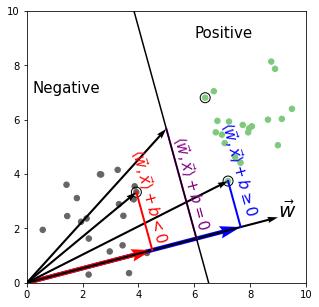

In [4]:
# Find projection of v2 on v1
def find_projection_v1(v1,v2):
    mag = np.sqrt(np.sum(np.square(v1)))
    return np.dot((np.dot(v1, v2)/np.square(mag)),v1)

# Utilize Sklearn and parameters for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Find properties of the hyperplane line
# Hyperplane coeff.
w = clf.coef_[0]
# Slope of hyperplane
m = -w[0] / w[1]
# Y-intercept of hyperplane
b = -clf.intercept_[0] / w[1]
# Perpendicular slope for w vect.
m_perp = -(1/m)
# Define the hyperplane line for plotting
xx = np.linspace(0, 10)
yy = m * xx + b
# Define a random point in the hyperplane
perp_point = [5, 5*m + b]
# Define intersection point of hyperplane and vector w
intersection_point = find_projection_v1(w ,perp_point)
# Defines the positive and negative point projections (blue & red lines)
v1 = clf.support_vectors_[1]
v2 = clf.support_vectors_[2]
# Defines vector w head
vw = [9, 9*m_perp]
# Projected points
v1_proj = find_projection_v1(vw, v1)
v2_proj = find_projection_v1(vw, v2)
# Defines vector line
x_tail = [0,0,0,0]
y_tail = [0,0,0,0]
x_head = [vw[0], v2[0], v1[0], perp_point[0]]
y_head = [vw[1], v2[1], v1[1], perp_point[1]]


# Plots
plt.figure(figsize=(5,5))
# Plot projections lines
plt.plot([v2[0], v2_proj[0]], [v2[1], v2_proj[1]], 'r', linewidth=2)
plt.plot([v1[0], v1_proj[0]], [v1[1], v1_proj[1]], 'b', linewidth=2)
plt.plot([perp_point[0], intersection_point[0]],[perp_point[1], intersection_point[1]], 'm', linewidth = 2)
# Plot Scatter of points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Accent)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
#Plot vectors
plt.quiver(0,0,v1_proj[0], v1_proj[1], color = 'blue', width = 0.015,
         angles='xy', scale_units='xy', scale=1)
plt.quiver(0,0,v2_proj[0], v2_proj[1], color = 'red', width = 0.015,
         angles='xy', scale_units='xy', scale=1)
plt.quiver(x_tail,y_tail,x_head, y_head,
         angles='xy', scale_units='xy', scale=1)
# Plot Hyperplane
plt.plot(xx, yy, 'k-')
# Plot text & properties of graph
plt.text(6, 9, 'Positive', fontsize=15)
plt.text(0.2, 7, 'Negative', fontsize=15)
plt.text(vw[0], vw[1], r'$\vec{w}$', fontsize=20)
plt.text(5.1, 2, r'$\langle \vec{w},\vec{x}\rangle +b=0$', rotation=-75, color = 'purple', fontsize=15)
plt.text(6.8, 2.5, r'$\langle \vec{w},\vec{x}\rangle +b\geq0$', rotation=-75, color = 'blue', fontsize=15)
plt.text(3.6, 1.5, r'$\langle \vec{w},\vec{x}\rangle +b<0$', rotation=-75, color = 'red', fontsize=15)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

Above, we can see that $\vec{w}$ is normal to the hyperplane. The positive class is defined if $\vec{x}$ projection on $\vec{w}$ is situated on the right side, or negative if the projection lies on the left side of the hyperplane. Formally this decision rule can be defined as:
<br><br>

<center>$\langle \vec{w},\vec{x}\rangle +b \geq 0$ then $y_{n} = +1$</center>
<br>
<center>$\langle \vec{w},\vec{x}\rangle +b \leq 0$ then $y_{n} = -1$</center>

Consequently, we can simplify the boundary decision rules above into a single equation:

$$y_{n}(\langle \vec{w},\vec{x}\rangle +b) \geq 0$$

However, we mentioned that the goal of the SVM is to maximize the margin of the hyperplane (distance from the median line to the closest point), so we would also have to define the margin line that defines the limits. 



### Concept of the Margin

We begin by defining a vector point, $\vec{x}_{a}$ that represent the point closest to hyperplane in the positive side. We then define the distance $r$ from the point $\vec{x}_{a}$ to the hyperplane by finding the orthogonal projection of $\vec{x}_{a}$ onto the hyperplane, which leads to a new vector $\vec{x}_{a}'$. Since the orthogonal projection is parallel to vector $\vec{w}$, we can now also define that $r$ is spanned in subspace of $\vec{w}$. Hence, in order to obtain the distance from the hyperplane to vector $\vec{x}_{a}$, we can formulate the following:


$$\vec{x}_{a} = \vec{x}_{a}' + r\frac{\vec{w}}{||\vec{w}||}$$


The equation above represents the margin distance $r$ between the hyperplane and $\vec{x}_{a}$. However, we would like to rescale the data such that the margin distance, $r$, is equal to 1; in other words, we want the margin defined as $\langle\vec{w},\vec{x}\rangle +b=1$. To do this, we first start with the definition of the hyperplane:

$$\langle \vec{w},\vec{x}\rangle +b=0$$

We know that $\vec{x}_{a}'$ lies on the hyperplane so it will be equivalent to:

$$\langle \vec{w},\vec{x}_{a}'\rangle +b=0$$

By substituting the margin distance equation to $\vec{x}_{a}'$ in the equation above:

$$\bigg\langle \vec{w},\vec{x}_{a}-r\frac{\vec{w}}{||\vec{w}||}\bigg\rangle +b=0$$

Using properties of the inner product, the equation above becomes:

$$\langle \vec{w},\vec{x}_{a}\rangle+b=r\frac{\langle{\vec{w},\vec{w}}\rangle}{||\vec{w}||}$$

If we want to scale the margin distance to be 1, we must derive the right hand side of the equation to be 1:

$$r\frac{\langle{\vec{w},\vec{w}}\rangle}{||\vec{w}||}=1$$

$$r||\vec{w}||=1$$

$$r=\frac{1}{||\vec{w}||}$$

The derivation of distance is now scaled in terms of the normal vector $\vec{w}$. Now, if we implement the margin in to the decision rule, we obtain the following:

$$y_{n}(\langle \vec{w},\vec{x}\rangle +b) \geq 1$$

The new decision rule now strictly requires that the sample be away from the margin. This makes the margin very sensitive to outliers, as it does not allow violations of the margin conditions. For instance, if the training data contained outliers of one class very close to the other, the margin would be very small; hence, the predictions are not strong. This type of strict margin is known as the hard margin SVM.

The optimization problem for the equation above then becomes:

$$\max_{w,b} \quad \frac{1}{||\vec{w}||}$$

$$s.t.\quad y_{n}(\langle \vec{w},\vec{x}\rangle +b)\geq1\quad\forall\quad n=1,...,N $$

Furthermore, the maximization criterion can be converted into a minimization problem described as follows:

$$\min_{w,b}\quad||\vec{w}||$$

$$s.t.\quad y_{n}(\langle \vec{w},\vec{x}\rangle +b)\geq1\quad\forall\quad n=1,...,N $$

However, we would like to use a better form that provides convenient computation of the gradient. Without losing generality, the constrained optimization criterion can be described as:

$$\min_{w,b}\quad\frac{1}{2}||\vec{w}||^2$$

$$s.t.\quad y_{n}(\langle \vec{w},\vec{x}\rangle +b)\geq1\quad\forall\quad n=1,...,N $$

The minimization function yields a quadratic function, therefore, the surface is a paraboloid. This implies that there is a single global minimum [5]. Thus, we would phase out the possibility of a local minimum in the gradient.

Let's apply this visually and observe how the margin line is defined.

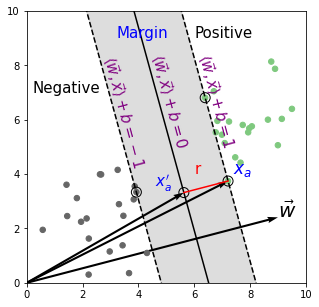

In [5]:
# Obtain Support Vector Classfier parameters using Sklearn library
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

## Find the properties of the hyperplane
# Hyperplane coeff.
w = clf.coef_[0]
# Slope of hyperplane
m = -w[0] / w[1]
# Y-intercept of hyperplane
b = clf.intercept_[0] / w[1]
# Define the hyperplane line for plotting
xx = np.linspace(0, 10)
yy = m * xx - b
# Perpendicular slope for w vect.
m_perp = -(1/m)

## Find the properties of the margin line
# Define lower margin line
v_down = clf.support_vectors_[0]
d_down = (v_down[1] - m * v_down[0])
yy_down = m * xx + d_down
# Define upper margin line
v_up = clf.support_vectors_[-1]
d_up = (v_up[1] - m * v_up[0])
yy_up = m * xx + d_up

## Define distance from support vector to hyperplane
# Define one support vector
supp_vec = clf.support_vectors_[1]
# Find the linear properties of the support vector using w vector slope
b_vec = supp_vec[1] - m_perp * supp_vec[0]
# Find x-intercept of support vector line and hyperplane
x_vec = (b_vec + b)/(m - m_perp)
# Find y-intercept of support vector line and hyperplane
y_vec = m_perp * x_vec + b_vec
# Defines vector head and tail points
vec_tail_x = [0,0,0]
vec_tail_y = [0,0,0]
vec_head_x = [9, supp_vec[0], x_vec]
vec_head_y = [9 * m_perp, supp_vec[1], y_vec]

## Plots
plt.figure(figsize=(5,5))
# Plot margin line 
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
# Plot distance line 
plt.plot([x_vec,supp_vec[0]],[y_vec, supp_vec[1]], 'r')
# Plot gray fill in margin line
plt.fill_between(xx, yy_down, yy_up, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
# Plot vectors
plt.quiver(vec_tail_x,vec_tail_y,vec_head_x, vec_head_y,
         angles='xy', scale_units='xy', scale=1)
# Plot scatter of points and outline support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Accent)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.scatter(x_vec, y_vec, s=100,
           linewidth=1, facecolors='none', edgecolors='k')
# Plot text and graph parameters
plt.text(9, 9*m_perp, r'$\vec{w}$', fontsize=20)
plt.text(6, 9, 'Positive', fontsize=15)
plt.text(0.2, 7, 'Negative', fontsize=15)
plt.text(4.6, 3.5, '$x_{a}\'$',color = 'blue' , fontsize=15)
plt.text(7.4, 4, '$x_{a}$',color = 'blue' , fontsize=17)
plt.text(6, 4, 'r',color = 'red', fontsize=15)
plt.text(3.2, 9, 'Margin', color = 'blue', fontsize=15)
plt.text(6, 5, r'$\langle \vec{w},\vec{x}\rangle +b=1$', rotation=-75, color = 'purple', fontsize=15)
plt.text(4.3, 5, r'$\langle \vec{w},\vec{x}\rangle +b=0$', rotation=-75, color = 'purple', fontsize=15)
plt.text(2.6, 4.3, r'$\langle \vec{w},\vec{x}\rangle +b=-1$', rotation=-75, color = 'purple', fontsize=15)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

## Sklearn Example using Hard Margin
If we were to compute the SVM margins using the Sklearn library, we have the following code below [2]. 

Note that the code used above is heavily based on the snippet below with some additional manoeuvering for illustration purposes.

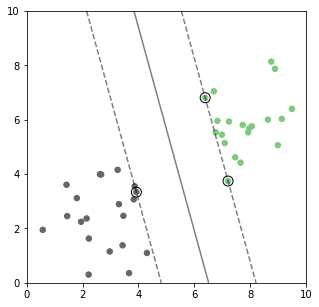

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Create a sample of 40 random with 2 classes of clusters
X, y = make_blobs(n_samples=40, centers=2, random_state=3)
X[:, 0] = X[:, 0] + 7
X[:, 1] = X[:, 1] + 2
# Fit the model using Sklearn
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
# Create margin line
plt.figure(figsize=(5,5))
xlim = plt.ylim(0,10)
ylim = plt.xlim(0,10)
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

## Plot

# Plot points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Accent)
ax = plt.gca()
# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Soft Margin SVM

As we previously discussed, the hard margin does not accept any form of outliers in between classes. Therefore, the data has to be linearly separable between the two classes in order to use the hard margin. For instance, take a look at the figure below.

(0.0, 7.0)

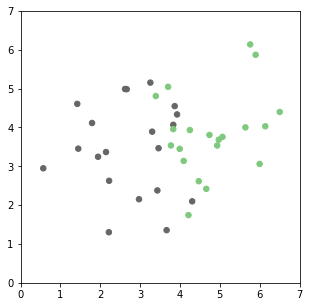

In [7]:
# Create a sample of 40 random with 2 classes of clusters
X, y = make_blobs(n_samples=40, centers=2, random_state=3)
X[:, 0] = X[:, 0] + 7
X[:, 1] = X[:, 1] + 3

# Move green cluster closer to black cluster
index = np.where(y == 0)
X[index] = X[index] - 3

# Plot the generated samples
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Accent)
plt.ylim(0,7)
plt.xlim(0,7)

We have that both classes are overlapping each other and there is no intuitive way to separate both classes. In order to draw a hyperplane that is able to separate both classes, we need to introduce a slack variable $\xi_{n}$ that allows specific data points to lie within the margin plane or even on the wrong side of the hyperplane. To incorporate this, we would need to re-define the optimization function we previously defined for the hard margin to take into account the slack variable. Therefore, the new objective function becomes:

$$\min_{w,b,\xi}\quad\frac{1}{2}||\vec{w}||^2+C\sum^{n}_{n=1}\xi_{n}$$

$$s.t.\quad y_{n}(\langle \vec{w},\vec{x}\rangle +b)\geq1-\xi_{n}\quad\xi_{n}\geq0\quad\forall\quad n=1,...,N $$

The relaxation of the hard margin SVM constraint is known as the soft margin SVM. The variable C is known as the regularization parameter since it determines the degree of relief that is allowed in the margin. For instance, a large C variable will have low regularization, hence, there is more constraint in the slack variables. This means that the margin will have very restrictive behavior for outliers [6]. Note that for a hard margin $C=\infty$.

### Hinge Loss Function

In order to quantify the error that the regularization term does, we would use a hinge loss function. The hinge loss function returns a value of 0 if it's on the correct side and a penalty value for a point that lies within the margin or on the wrong side. The penalty provides a linear loss that increases as it gets further away from the correct margin line. The function can be formalized as follows:

$$\ell(t)=max\{0,1-t\}\quad where\quad t=y(\langle w,x\rangle +b)$$

A more intuitive way can be represented as such: 

$$\ell(t) = \begin{cases} 0 & \text{if$\quad t\geq 1$}\\1-t & \text{if$\quad t<1$}\end{cases}$$

Now if we were to represent the loss corresponding to the hard margin, the expression would be as follows:

$$\ell(t) = \begin{cases} 0 & \text{if$\quad t\geq 1$}\\ \infty & \text{if$\quad t<1$}\end{cases}$$

Lets now observe both the soft margin and the hinge loss function using the Sklearn library below.

[LibSVM]
 
Hinge loss value in each data point for C = 1 are: 
 [0.   0.34 0.   0.93 0.   0.38 0.   0.   0.31 0.46 0.01 0.23 0.   0.68
 0.   0.   0.   0.   0.   0.25 0.   0.6  0.   0.   0.   0.   0.   0.
 0.55 0.   0.   0.   0.   0.   0.11 0.24 0.4  0.   0.   0.  ]
Slack variables indexes for C = 1 are: 
 (array([ 1,  3,  5,  8,  9, 10, 11, 13, 19, 21, 28, 34, 35, 36],
      dtype=int64),)
Slack variables cost for C = 1 are: 
 [0.34 0.93 0.38 0.31 0.46 0.01 0.23 0.68 0.25 0.6  0.55 0.11 0.24 0.4 ]
Total hinge Loss value for C = 1 is: 
 0.305
[LibSVM]
 
Hinge loss value in each data point for C = 100 are: 
 [0.   0.47 0.   0.   0.   0.88 0.   0.   0.66 0.   0.16 0.3  0.   0.
 0.   0.41 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.51 0.08 0.   0.   0.  ]
Slack variables indexes for C = 100 are: 
 (array([ 1,  5,  8, 10, 11, 15, 35, 36], dtype=int64),)
Slack variables cost for C = 100 are: 
 [0.47 0.88 0.66 0.16 0.3  0.41 0.51 0.08]
Total

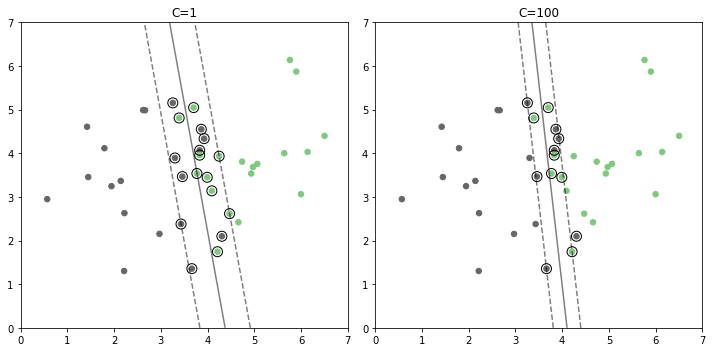

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss

# Create a sample of 40 random with 2 classes of clusters
X, y = make_blobs(n_samples=40, centers=2, random_state=3)

# Manouver data for overlap
X[:, 0] = X[:, 0] + 7
X[:, 1] = X[:, 1] + 3
index = np.where(y == 0)
X[index] = X[index] - 3

# Define figure size
plt.figure(figsize=(10, 5))

# Let find the plots and parameters for both C=0 and C=100
for i, C in enumerate([1, 100]):
    # Use Sklearn SVC model
    clf = SVC(kernel='linear', C=C,  random_state=42, tol=1e-5, verbose=1, max_iter=100000).fit(X, y)
    # Find loss values of each data point
    loss_values = np.round(abs(y-clf.decision_function(X)),2)
    # Convert loss values to hinge loss values by making values > 1 zero 
    hinge_loss_value = np.where(loss_values<1, loss_values, 0)
    # Find indexes where loss values are not zero
    slack_variable_index = np.where(hinge_loss_value!=0)
    # Define the slack variables using the indexes of non-zero values
    slack_variable_cost = hinge_loss_value[slack_variable_index]
    # Find the sum of losses in slack variables
    loss = np.sum(slack_variable_cost)
    # Find the total loss by dividing it by the number of support vectors
    total_loss = loss/len(clf.support_)
    # Alternative way of finding the hinge loss using Sklearn
    #total_loss = hinge_loss(y, clf.decision_function(X))
    # Print parameters
    print('\n \nHinge loss value in each data point for C = '+ str(C) +' are: \n', hinge_loss_value)
    print('Slack variables indexes for C = '+ str(C) +' are: \n', slack_variable_index)
    print('Slack variables cost for C = '+ str(C) +' are: \n', slack_variable_cost)
    print('Total hinge Loss value for C = '+ str(C) +' is: \n', total_loss)
    # Create two subplots for the two C values
    plt.subplot(1, 2, i + 1)
    # Plot the scattered data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Accent)
    # Properties of the line
    ax = plt.gca()
    xlim = plt.ylim(0,7)
    ylim = plt.xlim(0,7)
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    # Define the margin line
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the margin line and hyperplane
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    # Highlight the support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    # Identify which C plot is given
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

In the calculation of the total hinge function above, we used the formula of [7]:

$$\ell(t)=\frac{1}{N}\sum^{N}_{n=1}max\{0,1-t\}\quad where\quad t=y(\langle w,x\rangle +b)$$

Note that the N represents the number of support vectors (we'll cover this in the next topic). Since we have 3 support vectors that lie on the margin line, you will realize that there are only 8 slack variables instead of 13 (for case C=100). If you were to observe the graph of C=100, you would realize that there are 2 black points that lie on the margin line on the left and 1 green point that lies on the margin line on the right. For this reason, these support vectors would have a slack variable of 0. 

## Dual Support Vector Machine

Dual support vectors seek to consider the equivalent optimization problem known as the dual view. It uses the Lagrangian dual problem by forming the lagrangian minimization problem in terms of a single primal variable. This provides the advantage of introducing the independence of the number of features. Hence, the algorithm would become advantageous in instances where the number of features exceeds the number of examples in a dataset. Furthermore, you will later see how the dual view also helps in the use of kernels, and finding non-linear hyperplanes.

Let's begin deriving the Lagrangian using the optimization function and its respective constraints. We will introduce $\alpha_{n}\geq0$ which represent the Lagrange multiplier representing the constraint of the soft margin, and $\gamma_{n}\geq0$ to represent the Lagrange multiplier of the slack variable non-negativity constraint. Consequently, the Lagrangian is defined by:

$$\mathcal{L}(w,b,\xi,\alpha,\gamma)=\frac{1}{2}||\vec{w}||^2+C\sum^{N}_{n=1}\xi_{n}-\sum^{N}_{n=1}\alpha_{n}(y_{n}(\langle \vec{w},\vec{x}_{n}\rangle +b)-1+\xi_{n}-\sum^{N}_{n=1}\gamma_{n}\xi_{n}$$

Since we would like to obtain the minimum of the optimization function, we would perform the partial derivative the Lagrangian with respect to each of the primal variables $\vec{w}$, b, and $\xi$ and equate each partial derivative to zero. The resulting partial derivatives give the following:

$$\frac{\partial{\mathcal{L}}}{\partial{\vec{w}}}=\vec{w}^{T}-\sum^{N}_{n=1}\alpha_{n}y_{n}x_{n}^{T}$$

$$\frac{\partial{\mathcal{L}}}{\partial{b}}=-\sum^{N}_{n=1}\alpha_{n}y_{n}$$

$$\frac{\partial{\mathcal{L}}}{\partial{\xi{n}}}=C-\alpha_{n}-\gamma_{n}$$

Equating the equations to zero provide the following:

$$\vec{w}=\sum^{N}_{n=1}\alpha_{n}y_{n}x_{n}$$

$$\sum^{N}_{n=1}\alpha_{n}y_{n}=0$$

$$C-\alpha_{n}-\gamma_{n} = 0$$

If we substitute $\vec{w}$ into the lagrangian, we can start solving for the dual Lagrangian:

$$\mathfrak{D}(\xi,\alpha,\gamma)=\frac{1}{2}\sum^{N}_{n=1}\sum^{N}_{n=1}y_{i}y_{j}\alpha_{i}\alpha_{j}\langle x_{i},x_{j}\rangle - \sum^{N}_{n=1}y_{i}\alpha_{i}\bigg\langle\sum^{N}_{n=1}y_{j}\alpha_{j}x_{j},x_{i}\bigg\rangle+C\sum^{N}_{n=1}\xi_{i}-b\sum^{N}_{n=1}y_{i}\alpha_{i}+\sum^{N}_{n=1}\alpha_{i}-\sum^{N}_{n=1}\alpha_{i}\alpha_{i}\xi_{i}-\sum^{N}_{n=1}\gamma_{i}\xi_{i}$$

We then proceed to subtituting $\sum^{N}_{n=1}\alpha_{n}y_{n}=0$ to obtain:

$$\mathfrak{D}(\xi,\alpha,\gamma)=-\frac{1}{2}\sum^{N}_{n=1}\sum^{N}_{n=1}y_{i}y_{j}\alpha_{i}\alpha_{j}\langle x_{i},x_{j}\rangle+\sum^{N}_{n=1}\alpha_{i}+\sum^{N}_{n=1}(C-\alpha_{i}-\gamma_{i})\xi_{i}$$

Subtituting the last term, $C-\alpha_{n}-\gamma_{n} = 0$ gives us:

$$\mathfrak{D}(\xi,\alpha,\gamma)=-\frac{1}{2}\sum^{N}_{n=1}\sum^{N}_{n=1}y_{i}y_{j}\alpha_{i}\alpha_{j}\langle x_{i},x_{j}\rangle+\sum^{N}_{n=1}\alpha_{i}$$

We have now derived the dual optimization problem of the SVM, expressed solely on the Lagrange multiplier $\alpha$. From the definition of Lagrange duality, we find the maximum of the dual problem. Hence, if we change it to minimization, we get the negative dual problem, providing the following.

$$\min_{\alpha}\quad-\frac{1}{2}\sum^{N}_{n=1}\sum^{N}_{n=1}y_{i}y_{j}\alpha_{i}\alpha_{j}\langle x_{i},x_{j}\rangle+\sum^{N}_{n=1}\alpha_{i}$$

$$s.t.\quad \sum^{N}_{n=1}\alpha_{n}y_{n}=0, \quad0\leq\alpha\leq C\quad\forall\quad i=1,...,N $$

The constraint of $\alpha \leq C$ is found by using the equation of $C-\alpha_{n}-\gamma_{n} = 0$. Since we know that $\gamma_{i}$ is non-negative, we can say that $\alpha \leq C$. The same can be said for the Lagrange multiplier $\alpha$, which is also a non-zero, hence we derived the second constraint.

Note:
<br>
Any point that defines the hyperplane margin is referred to as a support vector (in the derivation of the margin, $\vec{x}_{a}$ is a support vector). Support vectors would each have a corresponding parameter $\alpha_{n}$ which help define the hyperplane. Therefore, the term "support" comes from the vectors that help assemble the hyperplane. Note that vectors don't help define the hyperplane, such as regular datasets, which would have an $\alpha$ of zero.

Below, we will see how we can use the Sklearn library to find the respective alpha values of each vector

[LibSVM]

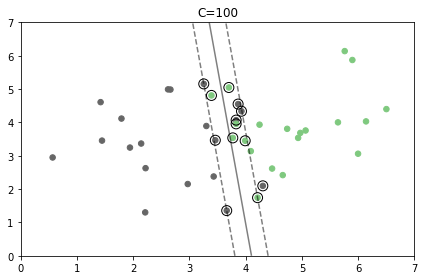

w vector coefficients = 
 [[-3.39035006 -0.3639425 ]]
w vector b intercept = 
 [13.91544186]
Indices of support vectors = 
 [ 1  5  8 10 19 35  0 12 28 33 34 36 37]
Support vectors points = 
 [[3.7020933  5.04757883]
 [3.99217291 3.44996325]
 [3.39267261 4.8096319 ]
 [3.77183472 3.53653954]
 [4.21219196 1.74387328]
 [3.83091152 3.95730655]
 [4.30563791 2.09825142]
 [3.83127822 4.06934994]
 [3.25604139 5.15553056]
 [3.92628228 4.33594276]
 [3.66392819 1.35566258]
 [3.46125806 3.46563881]
 [3.86624229 4.55028992]]
Number of support vectors for each class = 
 [6 7]
Coefficients of the support vector in the decision function (alpha) = 
 [[100.  ]
 [100.  ]
 [100.  ]
 [100.  ]
 [ 83.13]
 [100.  ]
 [100.  ]
 [100.  ]
 [ 68.44]
 [100.  ]
 [ 14.69]
 [100.  ]
 [100.  ]]


In [9]:
# Create a sample of 40 random with 2 classes of clusters
X, y = make_blobs(n_samples=40, centers=2, random_state=3)

# Manouver data for overlap between clusters
X[:, 0] = X[:, 0] + 7
X[:, 1] = X[:, 1] + 3
index = np.where(y == 0)
X[index] = X[index] - 3

# Use Sklearn SVC model
clf = SVC(kernel='linear', C=100,  random_state=42, tol=1e-5, verbose=1, max_iter=100000).fit(X, y)
# Define the hyperplane
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
# Define the margin line
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot results
ax = plt.gca()
xlim = plt.ylim(0,7)
ylim = plt.xlim(0,7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Accent)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# Print parameters
print('w vector coefficients = \n',clf.coef_)
print('w vector b intercept = \n',clf.intercept_)
print('Indices of support vectors = \n', clf.support_)
print('Support vectors points = \n', clf.support_vectors_)
print('Number of support vectors for each class = \n', clf.n_support_)
print('Coefficients of the support vector in the decision function (alpha) = \n', np.transpose(np.round(np.abs(clf.dual_coef_),2)))

The parameters above provide us with the weights and the support vectors used to define the hyperplane. Note that the constraint still applies for the alphas, where $\alpha<C$.

### Kernels

Up until this point we have covered the linearly separable case in SVM. Let us take a further look into non-linear separators and touch on the concepts of kernels.

Let's take a look at the following example below and try to apply a linear hyperplane [8].

D:\Program Files\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


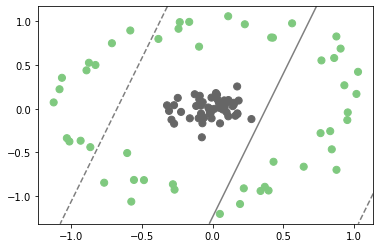

In [10]:
# Generate a non-linearly separable plot
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

# Plot it
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Accent')

# Find a linear hyperplane and margin line
clf = SVC(kernel='linear').fit(X, y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)


# Plot decision linear hyperplane and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.show()

# Warning may appear because model cannot fit the data

The sample above cannot be separated by a linear hyperplane. Let's now introduce the concept of the null space and kernel. 

We can use the kernel space to map a vector into a higher dimensional space such that we could define a linear hyperplane in a higher order that can classify between the two classes. Now we can define that the transformation of vector $x_{i}$ into a higher dimensional space is defined by $\phi(x_{i})$ using kernels. However, how do we implement such transformation to the SVM?

If you take a look into the dual Lagrangian optimization function, you will notice that the optimization depends only on the dot product of a pair of samples. We can expand this notion by implementing the dot product of the points that are mapped into a higher dimension using kernels [9]. Then, we can define the **kernel function** such that we can obtain the dot product of both vectors mapped into the higher dimensional space, and represent it as such:

$$K(x_{i},x_{j})=\langle\phi(x_{i}),\phi(x_{j})\rangle$$

Notice that the kernel function does not need the transformation to the higher space. Instead, it utilizes the outcome of the dot product in the higher space to define the function. This is one of the beauty of SVM which allow it the capability to define non-linear decision boundaries. Therefore, our new dual Lagrangian becomes [10]: 

$$\min_{\alpha}\quad-\frac{1}{2}\sum^{N}_{n=1}\sum^{N}_{n=1}y_{i}y_{j}\alpha_{i}\alpha_{j} K(x_{i},x_{j})+\sum^{N}_{n=1}\alpha_{i}$$

$$s.t.\quad K(x_{i},x_{j})=\langle\phi(x_{i}),\phi(x_{j})\rangle\quad \sum^{N}_{n=1}\alpha_{n}y_{n}=0, \quad0\leq\alpha\leq C\quad\forall\quad i=1,...,N $$

Some of the popular kernels used in SVM are [11]:

### The Linear Kernel Function

$$K(x_{i},x_{j})=\langle x_{i},x_{j}\rangle$$

### The Polynomial Kernel Function

$$K(x_{i},x_{j})=(\langle x_{i},x_{j}\rangle+1)^r, \quad r>1, \quad r \in \mathbb{R}$$


### The Radial Basis Function 

$$K(x_{i},x_{j})=e^{(-\frac{||x_{i}-x_{j}||^2}{2\sigma^2})}, \quad \sigma \in (0,+\infty)$$

Let's look at the Radial Basis Function (RBF) kernel in action in the figures below.

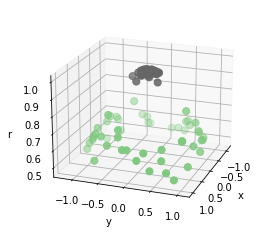

In [11]:
from mpl_toolkits import mplot3d
# Define sigma
sigma = 1
# Define the mapping of 2-D vectors in a higher space
r = np.exp(-np.square(X).sum(1)/2*sigma**2)
# Plot 3-D plot
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='Accent')
ax.view_init(elev=20, azim=20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

Note that the 3-D plot above can now be separated by a plane separating the two classes.

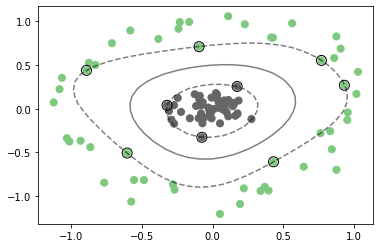

In [12]:
# Use SVM with different kernel
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Accent')

# Generate margin line
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Plot hyperplane and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

# Digit Recognition Example

**Courtesy of Sklearn**

We will be exploring the training of hand-written digit recognition using the SVM example provided by [12]. We will use a dataset that contains 1,797 samples of 10 class digits; each class having 180 samples each. For each data point, we have an 8x8 pixel array data that represents the hand-written digit.  

Let's begin importing the essential libraries and the dataset.

In [13]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm

# Assign the digit dataset
digits = datasets.load_digits()

# Print examples of features and labels
print('The array size of the features is: ', np.shape(digits.images))
print('The array size of the labels is: ', np.shape(digits.target))
print('A one digit array example: \n' + str(digits.images[0])+ '\n With the label of: ' + str(digits.target[0]))

The array size of the features is:  (1797, 8, 8)
The array size of the labels is:  (1797,)
A one digit array example: 
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
 With the label of: 0


We can see that we have 1797 samples consisting of an 8x8 (64 pixels) grey-scale array and class labels for each sample. 

Let's visualize some of the grey-scale images and it's respective labels

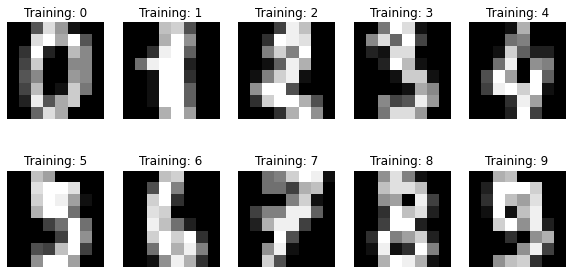

In [14]:
# Plot the training pixel images with its respective label
# Generate a count for indexes
count = 0 
# Create a subplot of 2x5
fig, axes = plt.subplots(2, 5)
# Set figure size
fig.set_figheight(5)
fig.set_figwidth(10)
# Plot each of the of the 10 digits and it's label
for i in range(2):
    for j in range(5):
        # Plot image
        axes[i][j].imshow(digits.images[count], cmap=plt.cm.gray)
        # Remove axis
        axes[i][j].axis("off")
        # Set title
        axes[i][j].set_title('Training: %i' % digits.target[count])
        count += 1

To work with the samples, we would need to reshape the sample array into a 64 by 1 array such that we obtain a single 64 dimension dataset. This will facilitate the training of the dataset. Additionally, we would also like to split the samples into a testing and training set. This is necessary as we need some samples to train the model, and others to evaluate the model. Once split, we would train the model with the training set, and find the predictions of the testing set such that we can evaluate the metrics of the model.

Let's take a look at the following:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import svm
# Re-shape data to a 64 dimension array
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Initialize Sklearn classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test by 50%
# Test - 899 Samples; Train - 898 Samples
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Create SVM model for the train data
classifier.fit(X_train, y_train)

# Find the predicted class for the test dataset
predicted = classifier.predict(X_test)

# Print the predicted values
print('The predicted values of the test set: \n', np.array(predicted))

The predicted values of the test set: 
 [8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 9 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 9 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 9 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 5 4 6 3 1 7 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 2 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 8 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 9 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 6 2 8 3 0 0 1 7 6 3 2

Now that we have the predicted labels, let's visualize its sample pairing and observe if it matches.

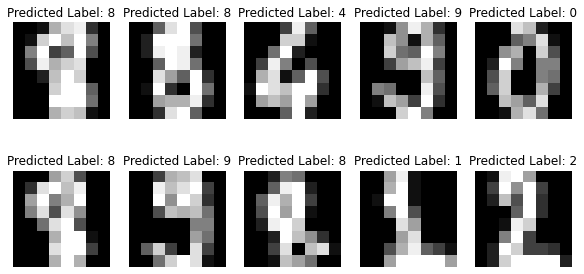

In [16]:
# Plot the predicted pixel images with its respective predicted label
# Generate a count for indexes
count = 0 
# Make a 2x5 subplot
fig, axes = plt.subplots(2, 5)
# Set figure size
fig.set_figheight(5)
fig.set_figwidth(10)
# Plot each of the of the 10 predicted digits and it's label
for i in range(2):
    for j in range(5):
        # Plot image
        axes[i][j].imshow(X_test[count].reshape((8,8)), cmap=plt.cm.gray)
        # Remove axis
        axes[i][j].axis("off")
        # Set title
        axes[i][j].set_title('Predicted Label: %i' % predicted[count])
        count += 1


Out of the small smaples of predicted values, we have no mislabelling by observation. However, we would like to evaluate the full model, and determine how well does the estimated perform.

We will now proceed by taking a look into the metrics of the model using Sklearn.

In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




We obtain the precision of each label, the recall percentage (defines the percentage of correctly classified samples), the f-1 score defining the accuracy of the model with each digit, and support column which indicates the number of occurences for each digit [13].

Let's also take a look into the confusion matrix which allow us to visualize the amount of misclassification in the model.

Text(0.5, 0.98, 'Confusion Matrix')

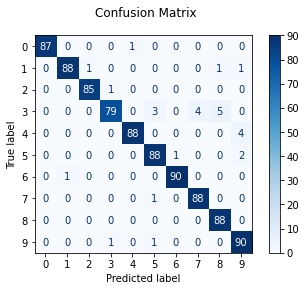

In [18]:
from sklearn.metrics import confusion_matrix
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
disp.figure_.suptitle("Confusion Matrix")

The table allows us to visually evaluate the performance of the model based on the number of labels correctly classified and misclassified. We are able to see that the rows of the confusion matrix represent the true labels, and the column represents the predicted labels. The diagonal consequently represents the number of correctly labeled classes as both predicted and true labels match. If we observe the first row of the matrix, we are able to see that there was one misclassification for that class, as the total number of true labels is 88 but the model predicted 87. Furthermore, it can also be seen that the misclassification of the 0 class was mistakenly identified as a 4. This becomes useful to identify patterns of misclassification in the model. For instance, we may conclude that 3 was the most misclassified class since it inherits similar to some properties of 5, 7, and 8.

# References



[1] M. P. Deisenroth, A. A. Faisal, and C. S. Ong, Mathematics for Machine Learning. Cambridge University Press, 2020.

[2] “SVM: Maximum margin separating hyperplane — scikit-learn 0.23.2 documentation.” https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py (accessed Nov. 19, 2020).

[3] “Support vector machines: The linearly separable case.” https://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-the-linearly-separable-case-1.html (accessed Nov. 19, 2020).

[4] A. Ng, “CS229 Lecture notes.” [Online]. Available: https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf.

[5] R. Berwick, “An Idiot’s guide to Support vector machines (SVMs),” p. 28.

[6] C. Cortes and V. Vapnik, “Support-vector networks,” Mach Learn, vol. 20, no. 3, pp. 273–297, Sep. 1995, doi: 10.1007/BF00994018.

[7] K. Crammer and Y. Singer, “On the Algorithmic Implementation of Multiclass Kernel-based Vector Machines,” p. 28.

[8] “In-Depth: Support Vector Machines | Python Data Science Handbook.” https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html (accessed Nov. 22, 2020).

[9] MIT OpenCourseWare, 16. Learning: Support Vector Machines. 2014.


[10] D. Sontag, “Support vector machines (SVMs) Lecture 2,” p. 31.

[11] Z. Liu and H. Xu, “Kernel Parameter Selection for Support Vector Machine Classification,” Journal of Algorithms & Computational Technology, vol. 8, no. 2, pp. 163–177, Jun. 2014, doi: 10.1260/1748-3018.8.2.163.

[12] “Recognizing hand-written digits — scikit-learn 0.23.2 documentation.” https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py (accessed Nov. 22, 2020).

[13] “Classification Report — Yellowbrick v1.2 documentation.” https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html (accessed Nov. 22, 2020).
